# Data Scoping Section for Biodiversity Analysis

The analysis in the provided notebook uses two datasets to explore biodiversity patterns and trends. Below is the scoping of the datasets:

## **Dataset Descriptions**

1. **`observations` Dataset**:
   - **Purpose**: Records the number of species observations in various national parks.
   - **Structure**:
     - **Rows**: 23,296
     - **Columns**: 
       - `scientific_name`: The species' scientific name.
       - `park_name`: The national park where the species was observed.
       - `observations`: Count of observations for the species in that park.
   - **Key Characteristics**:
     - No missing values in any column.
     - Data is structured for geographic and frequency-based analysis of species.

2. **`species_info` Dataset**:
   - **Purpose**: Provides details about species classification and conservation.
   - **Structure**:
     - **Rows**: 5,824
     - **Columns**:
       - `category`: Taxonomic group of the species (e.g., Mammal, Bird).
       - `scientific_name`: Unique biological name of the species.
       - `common_names`: Common names or synonyms of the species.
       - `conservation_status`: Conservation status (e.g., Endangered, Vulnerable); missing for most entries.
   - **Key Characteristics**:
     - Conservation status data is sparse, with only 191 non-null entries.

---

## **Scope of Analysis**
- **Data Integration**:
  - The datasets are linked via the `scientific_name` column to analyze species observations in the context of taxonomic information and conservation priorities.
- **Geographic Coverage**:
  - National parks listed in `park_name` column of the `observations` dataset.

## **Data Preparation**
1. **Cleaning**:
   - Addressed missing data by focusing on available fields.
   - Ensured consistency in `scientific_name` across both datasets.
2. **Merging**:
   - Combined datasets to enable multi-dimensional analysis of species frequency and conservation efforts.
3. **Conservation Data Handling**:
   - Although conservation status data is sparse, it was incorporated where available for critical species.

---

## **Limitations**
- **Conservation Analysis**:
  - Limited by sparse data in the `conservation_status` column.

---

## **Analytical Focus**
The datasets enable:
1. Regional biodiversity comparisons across national parks.
2. Assessment of species richness and relative abundance.
3. Identification of at-risk species using conservation status data.

Would you like to include detailed insights from the notebook's analysis?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

In [3]:
# make a directory to save the results
import os
os.makedirs('figures/', exist_ok=True)

In [4]:
# load the data
observations = pd.read_csv("data/observations.csv")
observations['scientific_name'] = observations['scientific_name'].str.lower()
observations['park_name'] = observations['park_name'].str.lower()
observations.sample(5)

,scientific_name,park_name,observations
20164,spiranthes lacera var. gracilis,yosemite national park,147
8980,galium lanceolatum,great smoky mountains national park,112
1647,gavia pacifica,yellowstone national park,220
11073,ivesia santolinoides,yellowstone national park,248
9019,lupinus stiversii,yellowstone national park,265


In [18]:
# Display the structure of the datasets
observations_info = observations.info()
print(observations_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [5]:
species = pd.read_csv("data/species_info.csv")
species['category'] = species['category'].str.lower()
species['scientific_name'] = species['scientific_name'].str.lower()
species['common_names'] = species['common_names'].str.lower()
species['conservation_status'] = species['conservation_status'].str.lower()
species.sample(5)

,category,scientific_name,common_names,conservation_status
4049,vascular plant,gayophytum racemosum,"blackfoot groundsmoke, black-foot groundsmoke",NaN
5155,vascular plant,lotus strigosus,"bishop's lotus, strigose bird's-foot trefoil, ...",NaN
516,fish,gambusia affinis,"mosquitofish, western mosquitofish",NaN
5807,vascular plant,saxifraga oregana,"box saxifrage, oregon saxifrage",NaN
2700,nonvascular plant,pohlia annotina,pohlia moss,NaN


In [6]:
species_info = species.info()
print(species_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [19]:
observ_species_merged = pd.merge(
    observations, species,
    on='scientific_name',
    how='inner'
)
# observ_species_merged.to_csv('data/merged_observations_species.csv', encoding='utf-8', index=False)

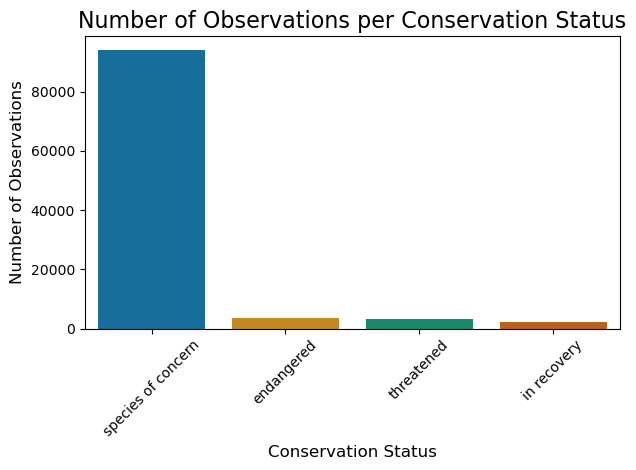

In [20]:
conserv_observ = (
    observ_species_merged.groupby('conservation_status')['observations']
    .sum()
    .reset_index()
    .sort_values(by='observations', ascending=False)
)
# conserv_observ.to_csv('data/conservation_status_observations.csv', encoding='utf-8', index=False)
sns.barplot(
    data=conserv_observ,
    x='conservation_status',
    y='observations',
    hue='conservation_status'
)
plt.title('Number of Observations per Conservation Status', fontsize=16)
plt.xlabel('Conservation Status', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/observ_per_conserv_stat.png', dpi=500)
plt.show()

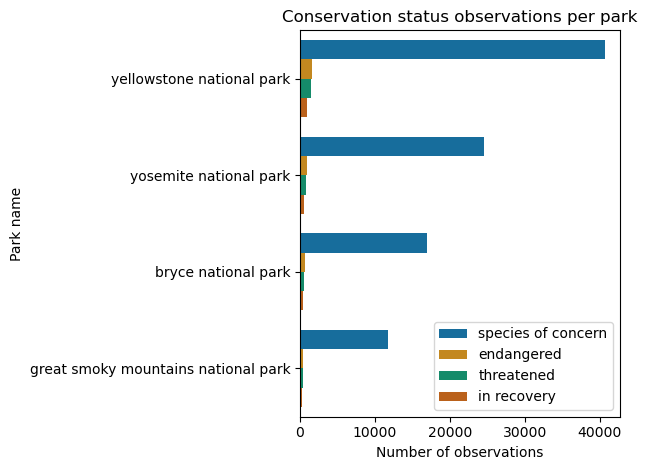

In [9]:
conservation_critical = observ_species_merged[observ_species_merged['conservation_status'].notna()]
conservation_status_per_park = conservation_critical.groupby(
    ['park_name', 'conservation_status'])['observations'].sum().reset_index().sort_values(by='observations', ascending=False)

sns.barplot(data=conservation_status_per_park,
           x='observations',
           y='park_name',
           hue='conservation_status')
# for i in range(len(conservation_status_per_park['conservation_status'])):
    # plt.text(i, conservation_status_per_park.observations[i], conservation_status_per_park.observations[i], ha='center')
plt.title('Conservation status observations per park')
plt.xlabel('Number of observations')
plt.ylabel('Park name')
plt.legend()
plt.tight_layout()
plt.savefig('figures/conserv_stat_per_park.png', dpi=500)
plt.show()

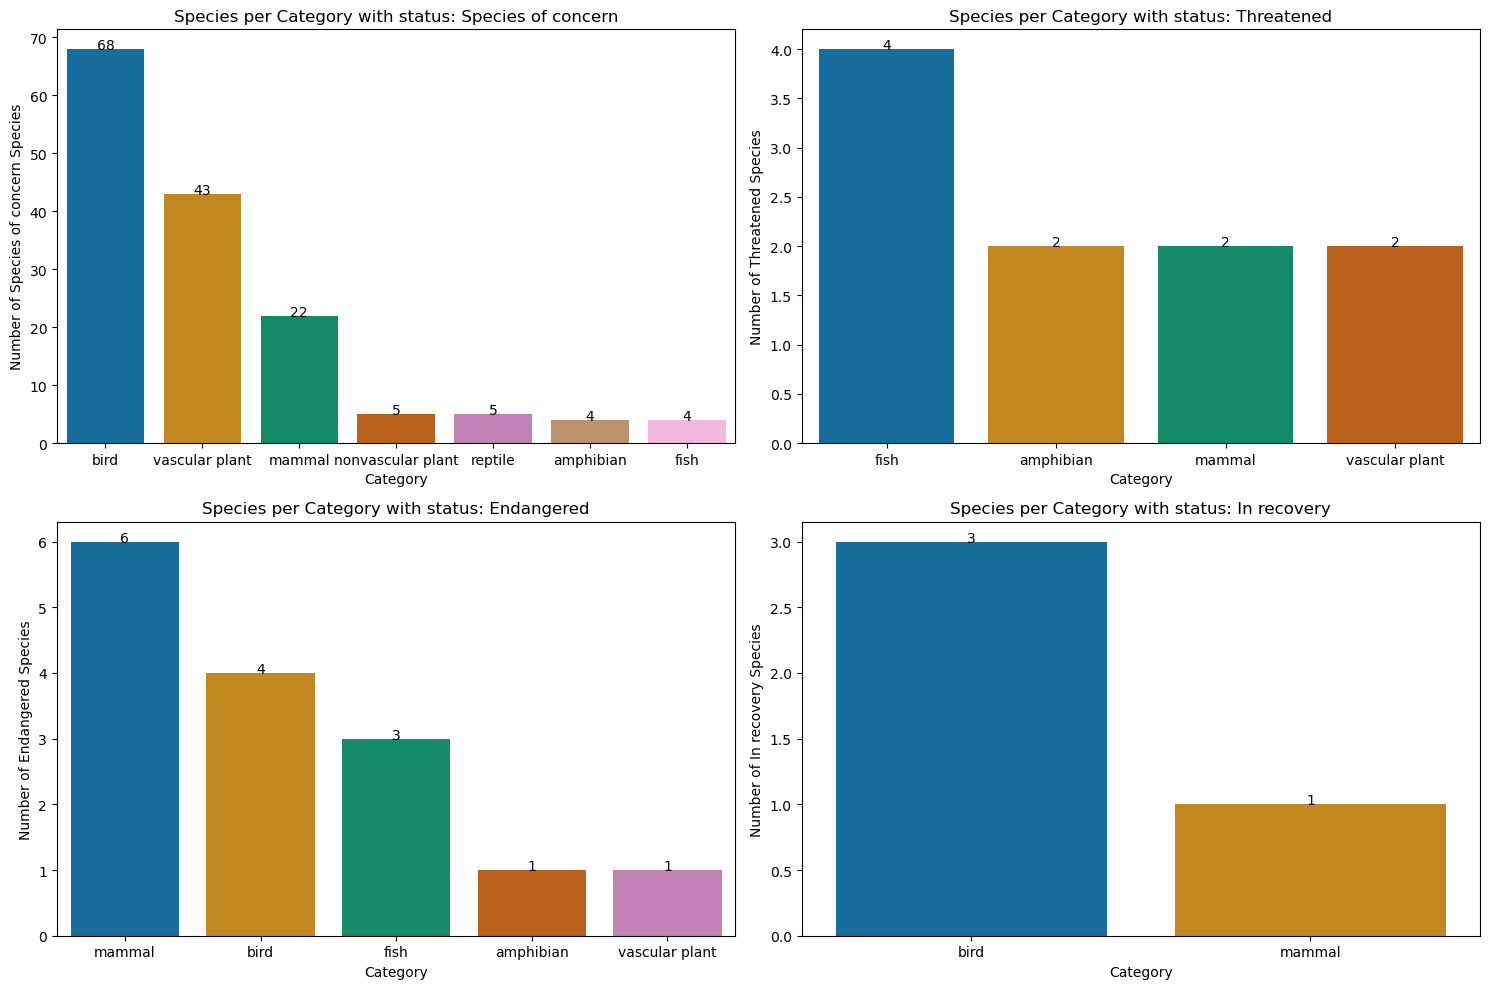

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

conservations_statuses_notna = observ_species_merged[observ_species_merged['conservation_status'].notna()]
conservations_statuses = conservations_statuses_notna['conservation_status'].unique()

# 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # it's easier to iterate over the axes like this

for idx, status in enumerate(conservations_statuses):
    status_species = conservations_statuses_notna[conservations_statuses_notna['conservation_status'] == status]
    status_cats = status_species.groupby('category')['scientific_name'].nunique().reset_index()
    status_cats.columns = ['category', f'{status}_species_count']
    status_cats = status_cats.sort_values(by=f'{status}_species_count', ascending=False).reset_index(drop=True)

    ax = axes[idx]
    sns.barplot(data=status_cats, x='category', y=f'{status}_species_count', hue='category', ax=ax, dodge=False)
    
    for i, row in status_cats.iterrows():
        ax.text(i, row[f'{status}_species_count'], row[f'{status}_species_count'], ha='center')
    ax.set_title(f'Species per Category with status: {status.capitalize()}')
    ax.set_xlabel('Category')
    ax.set_ylabel(f'Number of {status.capitalize()} Species')
plt.tight_layout()
plt.savefig('figures/species_per_category_status.png',dpi=500)
plt.show()

## Biodiversity across parks
### Park-level statistics
#### Number of Unique Species per Park

We define unique species as the number of unique species given their scientific name.

In [11]:
unique_species_per_park = observ_species_merged.groupby(by='park_name')['scientific_name'].nunique().reset_index()
unique_species_per_park.columns = ['park_name', 'unique_species_count']
unique_species_per_park

,park_name,unique_species_count
0,bryce national park,5541
1,great smoky mountains national park,5541
2,yellowstone national park,5541
3,yosemite national park,5541


The results show that the parks in terms of the amount of unique species they have are balanced.

### Descriptive statistics of observations per park

In [12]:
n_observ_per_park = observ_species_merged.groupby(by='park_name')['observations'].describe()
n_observ_per_park

,count,mean,std,min,25%,50%,75%,max
park_name,,,,,,,,
bryce national park,6408.0,98.828184,20.816897,9.0,85.0,99.0,113.0,176.0
great smoky mountains national park,6408.0,74.104713,20.358297,10.0,60.0,74.0,88.0,147.0
yellowstone national park,6408.0,247.759207,23.436166,57.0,234.0,249.0,262.0,321.0
yosemite national park,6408.0,148.166667,21.378883,31.0,134.0,149.0,162.0,223.0


### Park-Specific Summaries

In [21]:
park_summary = observ_species_merged.groupby(by='park_name').agg(
    total_species = ('scientific_name', 'nunique'),
    total_observations = ('observations', 'sum'),
    avg_observations = ('observations', 'mean'),
    min_observations = ('observations', 'min'),
    max_observations = ('observations', 'max')    
).reset_index()
# park_summary.to_csv('data/park_summary.csv', encoding='utf-8', index=False)

In [14]:
park_summary

,park_name,total_species,total_observations,avg_observations,min_observations,max_observations
0,bryce national park,5541,633291,98.828184,9,176
1,great smoky mountains national park,5541,474863,74.104713,10,147
2,yellowstone national park,5541,1587641,247.759207,57,321
3,yosemite national park,5541,949452,148.166667,31,223


### Biodiversity Indices across parks
#### Species richness
It is one of the simplest biodeversity indices. Essentially, it refers to the total number of different species observed in a specific area. In our context, it is the number of unique species recorded in each park. It is also called the **alpha diversity**.
#### Species evenness
It measures how evenly distributed are species within a given ecosystem. Mathematically, is translated to the relative number of individuals of each species in a given area.
#### Shannon-Wiener Diversity Index ($H'$)
This is an index that measures both the species richness and evenness of species distribution.
The formula to calculate Shannon-Wiener Diversity Index is:

$$H'=-\sum(p_i\times ln(p_i))$$

Where:
- $p_i$ is the proportion of individuals belonging to the $i$-th species.

This index increases with the number of species and the evenness of their distribution.

### Diversity scale metrics
#### Beta diversity
**Beta diversity**

In [22]:
import numpy as np
import pandas as pd

def calc_biodiversity(data):
    """
    Calculate biodiversity metrics: species richness, Shannon-Wiener index, and species evenness.
    """
    biodiversity_metrics = []

    for park, group in data.groupby('park_name'):
        # Calculate species richness | alpha diversity
        species_richness = group['scientific_name'].nunique()

        # Total number of observations for calculating proportions
        total_observations = group['observations'].sum()

        # Proportions for each species
        group['proportion'] = group['observations'] / total_observations

        # Shannon-Wiener index
        group['p_ln_p'] = group['proportion'] * np.log(group['proportion'])
        shannon_wiener_index = -group['p_ln_p'].sum()

        # Species evenness: H' / ln(S)
        species_evenness = shannon_wiener_index / np.log(species_richness) if species_richness > 1 else 0

        # Append the metrics for the current park
        biodiversity_metrics.append(
            {
                'park_name': park,
                'species_richness': species_richness,
                'shannon_wiener_index': shannon_wiener_index,
                'species_evenness': species_evenness
                
            }
        )
        
    return pd.DataFrame(biodiversity_metrics)

biodiversity_metrics = calc_biodiversity(observ_species_merged)
# biodiversity_metrics.to_csv('data/biodiversity_metrics.csv', encoding='utf-8', index=False)
biodiversity_metrics

,park_name,species_richness,shannon_wiener_index,species_evenness
0,bryce national park,5541,8.742310,1.014197
1,great smoky mountains national park,5541,8.725756,1.012277
2,yellowstone national park,5541,8.760403,1.016296
3,yosemite national park,5541,8.754435,1.015604


### Findings
The results indicate that all four parks have the same species richness (5,541), but their Shannon-Wiener Diversity Index (H') values differ slightly. Here's what can be concluded for each park:
1. Species Richness:
- Each park has the same species richness, meaning that the number of unique species recorded in all four parks is identical (5,541). This suggests that the parks have similar levels of biodiversity in terms of the variety of species.

2. Shannon-Wiener Diversity Index (H'):
As stated earlier, the Shannon-Wiener index reflects both species richness and the evenness of species distribution (how evenly species are represented). Here's what the values suggest:

**Bryce National Park ($H'$ = $8.742$)**:
- Slightly lower diversity compared to Yellowstone and Yosemite but similar to Great Smoky Mountains.
- Indicates a relatively balanced distribution of species, but with some unevenness (e.g., a few dominant species).

**Great Smoky Mountains National Park ($H'$ = $8.726$)**:
- Marginally lower diversity than Bryce and significantly lower than Yellowstone and Yosemite.
- Suggests that species in this park are less evenly distributed, with possibly more dominant species compared to the others.

**Yellowstone National Park ($H'$ = $8.760$)**:
- The highest diversity index among the parks.
- Indicates the most even distribution of species, with no single species overly dominating the ecosystem.

**Yosemite National Park ($H'$ = $8.754$)**:
- Similar diversity to Yellowstone, slightly higher than Bryce and Great Smoky Mountains.
- Suggests a well-balanced ecosystem with high biodiversity.

3. Key Insights:

**Evenness Drives H' Differences**:
- The slight differences in $H'$ values are driven by how evenly species are distributed across the parks. Yellowstone has the most even distribution, while Great Smoky Mountains is slightly less balanced.

## Significance test (chi-square)
- **Null hypothesis $(H_0)$**: There is no association between a species' category (e.g., bird, mammal) and its status (e.g., danger, safe).
- **Alternative hypothesis $H_1$**: There is some association between category and status

In [17]:
from scipy.stats import chi2_contingency
observ_species_merged.dropna(inplace=True)
# significance test
def map_status(status):
    if status in ['species of concern', 'endangered', 'threatened']:
        return 'danger'
    else:
        return 'safe'

observ_species_merged['status'] = observ_species_merged['conservation_status'].apply(map_status)

contingency_table = pd.crosstab(observ_species_merged['category'],
                                observ_species_merged['status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2, "p:", p, "dof:", dof)
print(expected)

Chi2: 14.321624234611669 p: 0.026242678018043204 dof: 6
[[ 27.23636364   0.76363636]
 [338.50909091   9.49090909]
 [ 46.69090909   1.30909091]
 [225.67272727   6.32727273]
 [ 19.45454545   0.54545455]
 [ 19.45454545   0.54545455]
 [178.98181818   5.01818182]]


### Findings
Since $p\approx0.026$ (less than than the conventional threshold of $0.05$), $H_0$ can be rejected. According to our data, we can observe some association between "category" and "status".

However, the chi-square test can show us that an association exists, but it cannot tell us which categories are driving the significance. To check that we need to perform a post-hoc analysis by:

1. comparing the observed vs the expected counts (`expected`)
2. standardising the residuals for each cell: $StdRes=\frac{(observed-expected)}{\sqrt{expected}}$

Assuming that residuals greater than about $+2$ or less than about $-2$ in absolute value are considered noteworthy.
This post-hoc analysis will clarify which categories are more or less "danger" or "safe" than expected under the assumption of independence.

In [18]:
# perform post-hoc analysis
std_residuals = (contingency_table - expected) / np.sqrt(expected)
significant_mask = (std_residuals > 2) | (std_residuals < -2)
print(significant_mask)
print(std_residuals)

status             danger   safe
category                        
amphibian           False  False
bird                False  False
fish                False  False
mammal              False   True
nonvascular plant   False  False
reptile             False  False
vascular plant      False   True
status               danger      safe
category                             
amphibian          0.146323 -0.873863
bird              -0.136374  0.814446
fish               0.191582 -1.144155
mammal            -0.377618  2.255193
nonvascular plant  0.123665 -0.738549
reptile            0.123665 -0.738549
vascular plant     0.375096 -2.240130


This analysis shows us that only two cells (i.e., `mammal, safe` and `vascular plant, safe`) stand out as "significantly different from expected".
By looking at True does not tell us whether the observed counts is above or below the expected value, thus for mammals we have $2.255$ which means that their observed counts fall above the expected number, whereas for vascular plants we have $-2.240$ which means that their observed counts fall below the expected.

To put these number in a context where we can undestand them we would say:

- mammals have more safe individuals than expected under the null hypothesis
- vascular plants have less safe individuals than expected under the null hypothesis.

To sum up the findings, we conclude that we can observe an association between category and status (i.e., "safe", "danger") ($p\approx.0.0262$). The two categories that drive this association are mammals which have more safe individuals than expected ($StdRes_{mammal}\approx2.255$) and vascular plants which have less safe individuals than expected ($StdRes_{vascular\ plant}\approx-2.240$).